Création d'un réseau de neurones affines à partir de python seulement (et la fonction dot de numpy pour les calculs matriciels)

Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

Initialisation des poids W et des biais par une valeur aléatoire

In [28]:
def init(dimensions):

    C = len(dimensions)
    params = dict()

    for couche in range(1,C):
        params['W'+str(couche)] = np.random.randn(dimensions[couche],dimensions[couche - 1])
        params['b'+str(couche)] = np.random.randn(dimensions[couche],1)
    
    return params

Forward Propagation, activations de tout les neurones, un par un, couche par couche, et leurs résultats dépendant des résultats des couches précédentes.

Formule : $ Z^{[c]} = W^{[c]}A^{[c-1]} + b^{[c]} $
$ A^{[c]} = \sigma(Z^{[c]}) $

In [29]:
def forward_propagation(X,parametres):
    activations = {'A0': X}
    C = len(parametres) // 2
    for c in range(1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

Back Propagation, même principe que la forward propagation, mais en arrière, c'est ce qui va permettre d'entraîner le réseau de neurones

Formule : $ dZ^{[c]} = A^{[c]} - y $
$ dW^{[c]} = \frac{1}{m} dZ^{[c]} A^{[c-1]T} $
$ db^{[c]} = \frac{1}{m} \sum dZ^{[c]} $

In [30]:
def backpropagation(X,y,activations,params):
    m = y.shape[1]
    C = len(params) // 2

    dZ = activations['A' + str(C)] - y
    gradients = {}

    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(params['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

    return gradients

Mise à jour des poids et des biais, cela est effectué pendant l'entraînement du réseau de neurones, la "vitesse" d'apprentissage est régulée selon un pas d'apprentissage ou learning rate

In [31]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

Fonction de prédiction d'un résultat lorsqu'on donne au réseau de neurones une donnée d'entrée

In [32]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

Fonction principale d'entraînement du réseau de neurones

Log Loss : 

$$ J(y, \hat{y}) = - \frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right) $$

In [33]:
def deep_neural_network(X,y,hidden_layers=(16,16,16),learning_rate=0.1,epoches=3000):
    np.random.seed(0)
    dimensions = list(hidden_layers)
    dimensions.insert(0,X.shape[0])
    dimensions.append(y.shape[0])
    parametres = init(dimensions)
    train_loss = []
    train_acc = []

    for i in tqdm(range(epoches)):
        activations = forward_propagation(X,parametres)
        gradients = backpropagation(X,y,activations,parametres)
        parametres = update(gradients,parametres, learning_rate)

        if i % 10 == 0:
            C = len(parametres) // 2
            train_loss.append(log_loss(y,activations['A'+str(C)]))
            y_pred = predict(X,parametres)
            acc = accuracy_score(y.flatten(),y_pred.flatten())
            train_acc.append(acc)

    #fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    return parametres

Test du réseau de neurones sur un dataset classique

dimensions de X: (2, 100)
dimensions de y: (1, 100)


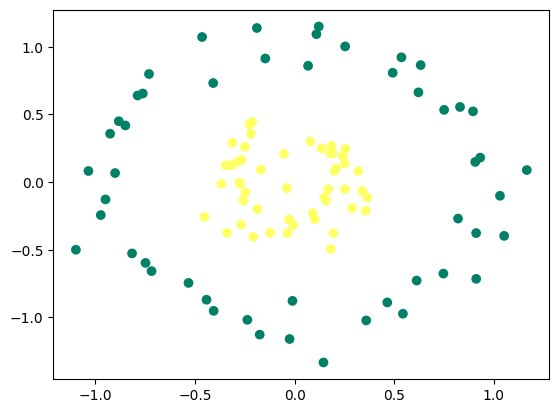

 24%|██▍       | 241/1000 [00:00<00:00, 2364.06it/s]

100%|██████████| 1000/1000 [00:00<00:00, 2604.57it/s]


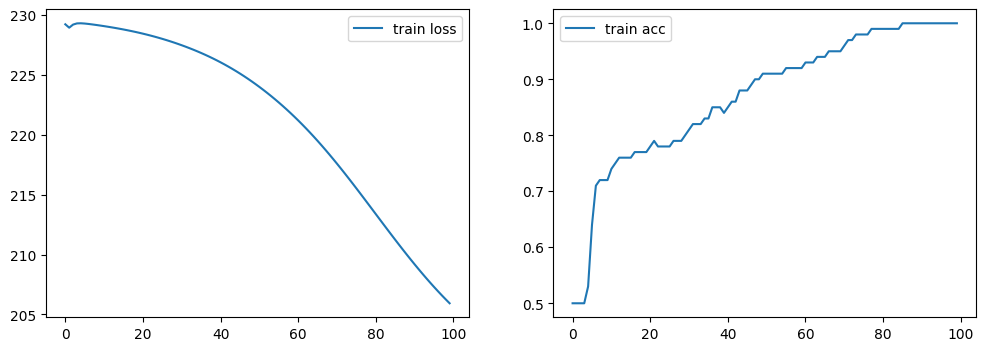

{'W1': array([[ 2.03632076,  0.52116737],
        [ 1.62824275,  3.54088269],
        [ 1.83412786, -1.09756493],
        [ 1.12685649, -0.37317282],
        [-0.05045605,  0.68641787],
        [ 0.06095657,  2.35920707],
        [ 0.36368701,  0.60293379],
        [ 0.48560233,  0.32637325],
        [ 1.84797373, -0.31145423],
        [ 0.4103085 , -1.34157732],
        [-3.60271275,  0.63233457],
        [ 1.61881172, -1.11101895],
        [ 2.26015986, -1.76943294],
        [-0.31706725, -0.27799426],
        [ 1.64089691,  1.39905172],
        [ 0.22739164,  0.08020622]]),
 'b1': array([[-1.31064263],
        [-2.26471796],
        [-0.7341089 ],
        [ 0.23542921],
        [ 1.05687223],
        [ 1.27033211],
        [-0.24606902],
        [-0.33361378],
        [-1.22729885],
        [-1.4751863 ],
        [-1.82344415],
        [ 1.76352287],
        [-0.7492215 ],
        [-0.66469733],
        [-1.28800179],
        [ 0.73825475]]),
 'W2': array([[-1.61754721, -0.20976465,

In [34]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, epoches=1000)
# on retrouve les paramètres du réseau entraîné en sortie